In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize 
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc 
from sklearn.decomposition import PCA 


In [51]:
df=pd.DataFrame(women_health_data)
print(df)

     age        BMI  exercise_frequency  health_score
0     56  23.818838                   5      0.292103
1     46  31.862928                   4      3.976596
2     32  22.701571                   2     60.407168
3     60  29.744795                   5     90.738016
4     25  31.043760                   1     23.885666
..   ...        ...                 ...           ...
995   22  25.636215                   6     87.417068
996   40  23.644966                   5     20.343648
997   27  26.851341                   5     12.738642
998   61  25.751943                   5     28.550878
999   19  20.243467                   0     53.157740

[1000 rows x 4 columns]


Step 1: Load the dataset

In [52]:
data = pd.read_csv('women_health_data.csv')
data.head(5)


,age,BMI,exercise_frequency,health_score
0,56,23.818838,5,0.292103
1,46,31.862928,4,3.976596
2,32,22.701571,2,60.407168
3,60,29.744795,5,90.738016
4,25,31.043760,1,23.885666


Step 2: Data Preprocessing

In [53]:
# Even if we do not specify axis = 0,
# the method will return the mean over
# the index axis by default
data.mean(axis = 0)
# skip the Na values while finding the mean
data.mean(axis = 1, skipna = True)


0      21.277735
1      21.459881
2      29.277185
3      46.370703
4      20.232356
         ...    
995    35.263321
996    22.247153
997    17.897496
998    30.075705
999    23.100302
Length: 1000, dtype: float64

In [54]:
data.isnull().values.any()
data.isnull()

,age,BMI,exercise_frequency,health_score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [55]:
# Step 2: Data Preprocessing
# missing data finding
data.fillna(data.mean(), inplace=True)


Step 3: Feature Scaling

In [56]:
# Initialise
scaler = StandardScaler()
# To scale data
scaled_features = scaler.fit_transform(features)

Step 4: Hierarchical Clustering

In [57]:
# Fit hierarchical clustering
num_clusters = 4  # Choose the number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters)
hierarchical_labels = hierarchical_model.fit_predict(scaled_features)

In [58]:
# Add cluster labels to the original data
data['hierarchical_cluster'] = hierarchical_labels

Step 5: Gaussian Mixture Model

In [61]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(scaled_features)
gmm_labels = gmm.predict(scaled_features)

In [62]:
# Add GMM labels to the original data
data['gmm_cluster'] = gmm_labels

 Step 6: Evaluation

In [64]:
 # Calculate silhouette scores for both clustering methods
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)
gmm_silhouette = silhouette_score(scaled_features, gmm_labels)

In [65]:
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}')
print(f'Silhouette Score for GMM: {gmm_silhouette:.3f}')

Silhouette Score for Hierarchical Clustering: 0.124
Silhouette Score for GMM: 0.158


Step 7: Visualize Clusters

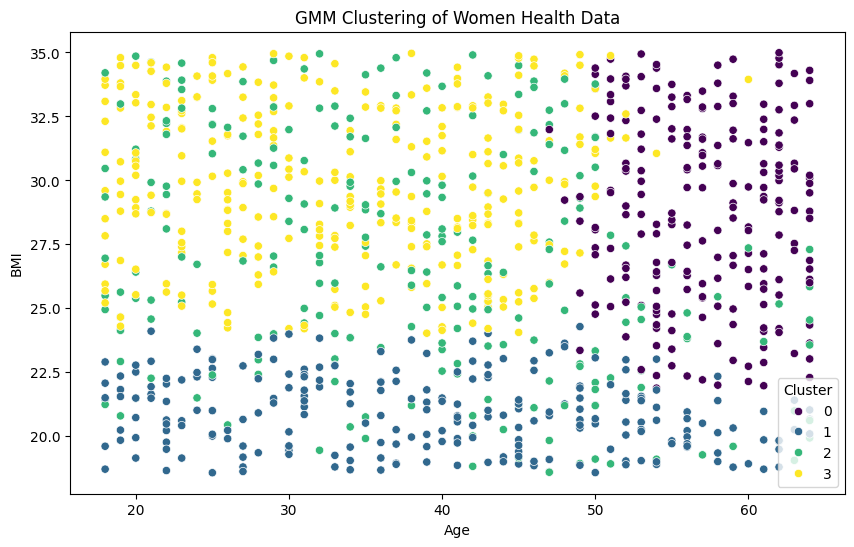

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['BMI'], hue=data['gmm_cluster'], palette='viridis')
plt.title('GMM Clustering of Women Health Data')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()